## Task 4.1 Hand-designed MLP

Design an MLP that exactly recognizes the blue region bounded by the given line segments. The network should not be learned. Instead, design the weights and biases by hand.  
_Hint_: Setup 4 neurons, one for each separation line, and connect them using further neurons representing AND or OR operations.  
Use the [Heaviside](https://numpy.org/doc/stable/reference/generated/numpy.heaviside.html) activation function to yield a sharp decision:
\begin{equation*}
    H(x) = \begin{cases} 1 &\quad\text{if $x \geq 0$} \\ 0 &\quad\text{else}\end{cases}
\end{equation*}

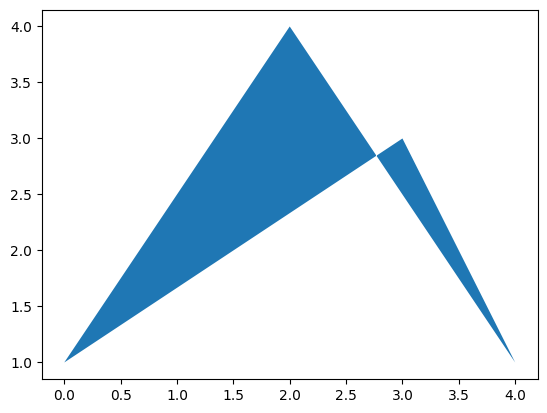

In [1]:
import numpy as np
from matplotlib import pyplot as plt
region = np.array([[0,1], [3, 3], [3, 3], [4, 1], [4, 1], [2, 4], [2, 4], [0, 1]])
plt.fill(*region.T)
plt.show()

In [6]:
import numpy as np

# Define the Heaviside activation function
def heaviside(x):
    return np.heaviside(x, 0)

# Define the AND and OR operations
def AND(x, y):
    return heaviside(x + y - 1)

def OR(x, y):
    return heaviside(x + y)

# Define the input point
x = np.array([0.5, 0.5])

# Define the weights and biases for each neuron
W1 = np.array([[2, -1], [1, 1], [0.5, -1], [-1, 1]])
b1 = np.array([-1, -2, -0.5, -1])
W2 = np.array([[1, 1], [1, 1]])
b2 = np.array([-1, -1])
W3 = np.array([1, 1])
b3 = np.array([-1])

# Compute the output of each neuron in the first hidden layer
z1 = np.dot(W1, x) + b1
a1 = heaviside(z1)

# Compute the output of each neuron in the second hidden layer
z2 = np.dot(W2, a1) + b2
a2 = np.array([OR(z2[0], z2[1])])

# Compute the output of the network
z3 = np.dot(W3, a2) + b3
output = AND(z3, 1)

# Print the output of the network
print(output)


ValueError: shapes (2,2) and (4,) not aligned: 2 (dim 1) != 4 (dim 0)

## Task 4.2 Activation Functions

Given the following definitions of the logistic function and tanh:
\begin{align}
  \sigma(x) &= \frac{1}{1 + e^{-x}} \\
  \tanh(x) &= \frac{e^x - e^{-x}}{e^x + e^{-x}}
\end{align}

prove the following identities:
\begin{align}
  \tanh(x) &= 2 \sigma(2x) - 1 \\
  \frac{\partial}{\partial x}\sigma(x) &= \sigma(x) \cdot (1-\sigma(x)) \\
  \frac{\partial}{\partial x}\tanh(x) &= 1 - \tanh^2(x)
\end{align}

Lets start with: 

\begin{align}
    \tanh(x) &= 2 \sigma(2x) - 1 \\
    &= \tanh(x) = 2 (\frac{1}{1 + e^{-2x}}) - 1 \\ 
    &= \frac{e^x - e^{-x}}{e^x + e^{-x}} = (\frac{2}{1 + e^{-2x}}) - 1 \\
    &= \frac{2}{1 + e^{-2x}} - \frac{e^x - e^{-x}}{e^x + e^{-x}} - 1  \\ 
    &= \frac{2e^{x}}{e^{x}(1 + e^{-2x})} - \frac{e^x - e^{-x}}{e^x + e^{-x}} - 1 \\
    &= \frac{2e^{x}}{e^{x} + e^{-x}} - \frac{e^x - e^{-x}}{e^x + e^{-x}} - 1  \\ 
    &= \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} - 1  \\ 
    &= \tanh(x) - 1 \\ 
    &= 1 = \tanh(x)
\end{align}

The second equation: 

\begin{align}
    \frac{\partial}{\partial x}\sigma(x) &= \sigma(x) \cdot (1-\sigma(x)) \\
    &= (\sigma(x))' \\
    &= (\frac{1}{1 + e^{-x}})' \\
    &= \frac{0*(1 + e^{-x}) - (-e^{-x})}{(1 + e^{-x})^2} \\
    &= \frac{e^{-x}}{(1 + e^{-x})^2} \\
    &= \frac{e^{-x}}{1 + e^{-x}} * \frac{1}{1 + e^{-x}} \\ 
    &= \frac{e^{-x}}{1 + e^{-x}} * \sigma(x) \\
    &= (e^{-x}*\sigma(x)) * \sigma(x) \\
    &= \sigma(x) \cdot (1-\sigma(x))
\end{align}

The third equation: 

\begin{align}
    \frac{\partial}{\partial x}\tanh(x) &= 1 - \tanh^2(x) \\
    &= (\tanh(x))' \\
    &= (\frac{e^x - e^{-x}}{e^x + e^{-x}})' \\
    &= \frac{(e^x + e^{-x}) * (e^x + e^{-x}) - (e^x - e^{-x}) * (e^x - e^{-x})}{(e^x + e^{-x})^2} \\
    &= \frac{(e^x + e^{-x})^2 - (e^x - e^{-x})^2}{(e^x + e^{-x})^2} \\
    &= \frac{(e^x + e^{-x})^2}{(e^x + e^{-x})^2} - \frac{(e^x - e^{-x})^2}{(e^x + e^{-x})^2} \\
    &= 1 - \frac{(e^x - e^{-x})^2}{(e^x + e^{-x})^2} \\
    &= 1 - \tanh^2(x)
\end{align}


## Task 4.3 1d Gaussian

Following the [interactive tutorial from Michael Nielson](http://neuralnetworksanddeeplearning.com/chap4.html), design a single-hidden-layer network to mimic a mixture of two 1d Gaussians and visualize your network's output together with the original function. As our focus isn't a particularly precise approximation, it suffices to use two hidden neurons per Gaussian bump.
Which of the known nonlinearities (Heaviside, logistic, tanh, (leaky) ReLu) is best suited to yield good approximation results?

4/4 [==============================] - 0s 501us/step


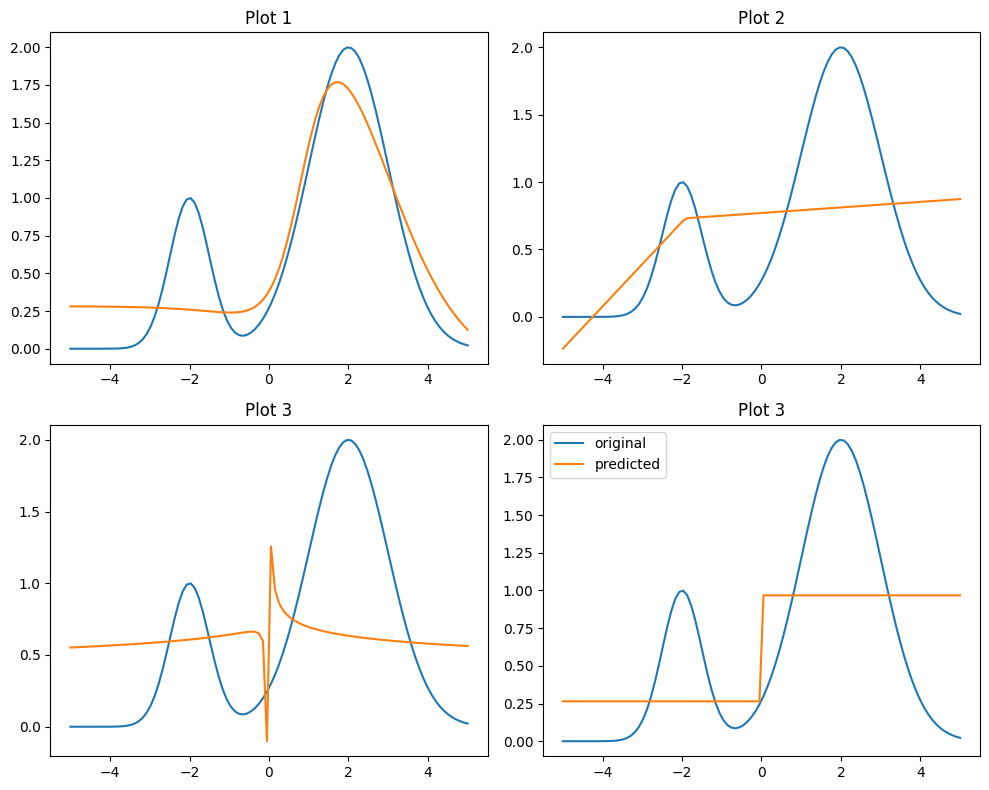

In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K

def Gaussian(x, mu=0, sigma=1):
    if x.ndim == 1:
        x = x[:, np.newaxis] 
    return np.exp(-np.linalg.norm(x - mu, axis=-1)**2 / (2 * sigma**2))

#Generating
x = np.linspace(-5, 5, 100)
y = Gaussian(x, mu=-2, sigma=0.5) + 2 * Gaussian(x, mu=2, sigma=1)


def calculate(activaton):
    model = tf.keras.models.Sequential([tf.keras.layers.Dense(2, activation=activaton, input_shape=(1,)), tf.keras.layers.Dense(1)])

    #Compiling a model
    model.compile(optimizer='adam', loss='mse')
    model.fit(x, y, epochs=1000, verbose=0)

    #Predicting output
    y_pred = model.predict(x)
    return y_pred

def log_activation(x):
    return K.log(K.abs(x) + 1e-6)

def heavyside_activation(x):
    return K.cast(x >= 0, dtype=K.floatx())

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(x, y, label='original')
axs[0, 0].plot(x, calculate("tanh"), label='predicted')
axs[0, 0].set_title('Plot 1')

axs[0, 1].plot(x, y, label='original')
axs[0, 1].plot(x, calculate("ReLU"), label='predicted')
axs[0, 1].set_title('Plot 2')

axs[1, 0].plot(x, y, label='original')
axs[1, 0].plot(x, calculate(log_activation), label='predicted')
axs[1, 0].set_title('Plot 3')

axs[1, 1].plot(x, y, label='original')
axs[1, 1].plot(x, calculate(heavyside_activation), label='predicted')
axs[1, 1].set_title('Plot 3')

axs[1, 1].legend()

fig.tight_layout()

plt.show()


Since the tanh activation function is a smooth function and the heavyside and ReLu are not and the logistic function does not approach the look of a curve, it can be said that between the 4 activation functions the tanh function yields the best approximation.

## Task 4.4 2d Gaussian

In a similar fashion, design a network to approximate the following 2d Gaussian:

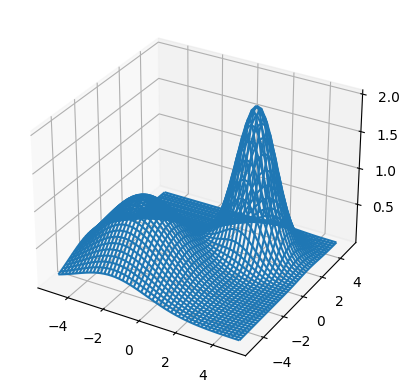

In [4]:
from mpl_toolkits.mplot3d import Axes3D  # enable 3d plotting

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
XY = np.stack(np.meshgrid(x, y), axis=-1)  # create grid of (x,y) pairs
Z = Gaussian(XY, mu=np.array([-2,-2]), sigma=2) + 2*Gaussian(XY, mu=np.array([2,2]))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(XY[:,:,0], XY[:,:,1], Z);